## Análisis de las condiciones de instalación de los sensores

En un primer momento es necesario revisar si ambos sensores están calibrados entre sí. Con el objetivo de ver si existe alguna diferencia entre los datos obtenidos.
Se dejaron en igualdad de condiciones desde el 25/07/23 a las 5pm aproximadamente. Se dejarán una semana a ver cómo evolucionan.

A manera de nomenclatura:
- Estación 21: Sensor pared
- Estación 22: Sensor bajo
- Estación 23: Sensor alto

In [2]:
#Importamos algunas librerias
from MakeSens import MakeSens
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import matplotlib.dates as mdates
import pytz

### Carga de datos

In [11]:
# Tomamos los datos de la semana
end_date = "2023-08-01 00:00:00"
start_date = "2023-07-25 00:00:00"

# end_date = datetime.datetime.now(pytz.timezone('America/Bogota')).strftime("%Y-%m-%d %H:%M:%S")
# start_date = (datetime.datetime.now(pytz.timezone('America/Bogota')) - datetime.timedelta(days=7)).strftime("%Y-%m-%d %H:%M:%S")

In [12]:
#Cargamos los datos
data_21 = MakeSens.download_data("E2_00021", start_date, end_date) #Detrás del muro

data_22 = MakeSens.download_data("E2_00022", start_date, end_date) 
data_23 = MakeSens.download_data("E2_00023", start_date, end_date)

#Filtramos las columnas que nos interesan
data_21 = data_21[['pm1_1', 'pm1_2','pm10_1', 'pm10_2', 'pm25_1', 'pm25_2']]
data_22 = data_22[['pm1_1', 'pm1_2','pm10_1', 'pm10_2', 'pm25_1', 'pm25_2']]
data_23 = data_23[['pm1_1', 'pm1_2','pm10_1', 'pm10_2', 'pm25_1', 'pm25_2']]

data_21.index = pd.to_datetime(data_21.index)
data_22.index = pd.to_datetime(data_22.index)
data_23.index = pd.to_datetime(data_23.index)

data_21

,pm1_1,pm1_2,pm10_1,pm10_2,pm25_1,pm25_2
2023-07-25 00:00:00,12.0,8.4,17.799999,13.0,17.600000,12.4
2023-07-25 00:01:00,13.2,8.6,20.600000,14.8,20.400000,14.4
2023-07-25 00:02:00,11.4,8.2,20.799999,11.4,19.799999,10.4
2023-07-25 00:03:00,13.0,11.2,23.000000,16.6,22.000000,15.6
2023-07-25 00:04:00,11.0,12.0,19.200001,15.8,19.000000,15.6
...,...,...,...,...,...,...
2023-07-31 23:55:00,1.8,4.6,2.800000,5.0,2.800000,5.0
2023-07-31 23:56:00,2.2,1.4,5.200000,2.2,4.000000,2.2
2023-07-31 23:57:00,1.6,1.8,3.000000,4.0,2.800000,4.0
2023-07-31 23:58:00,1.4,4.8,3.000000,4.8,2.200000,4.8


### Calibración sensores internos


Cada estación cuenta con dos sensores. Para trabajar con ellos es posible promediarlos, o trabajar con una media móvil. Para promediarlos, primero debemos mirar si los datos tomados por cada sensor son similares, con el fin de no perder información importante.

Para los gráficos utilizaremos los datos de $PM_{10}$ dado que son los que tienen mayor cantidad de datos. Pero el análisis se puede realizar con cualquier otro parámetro.

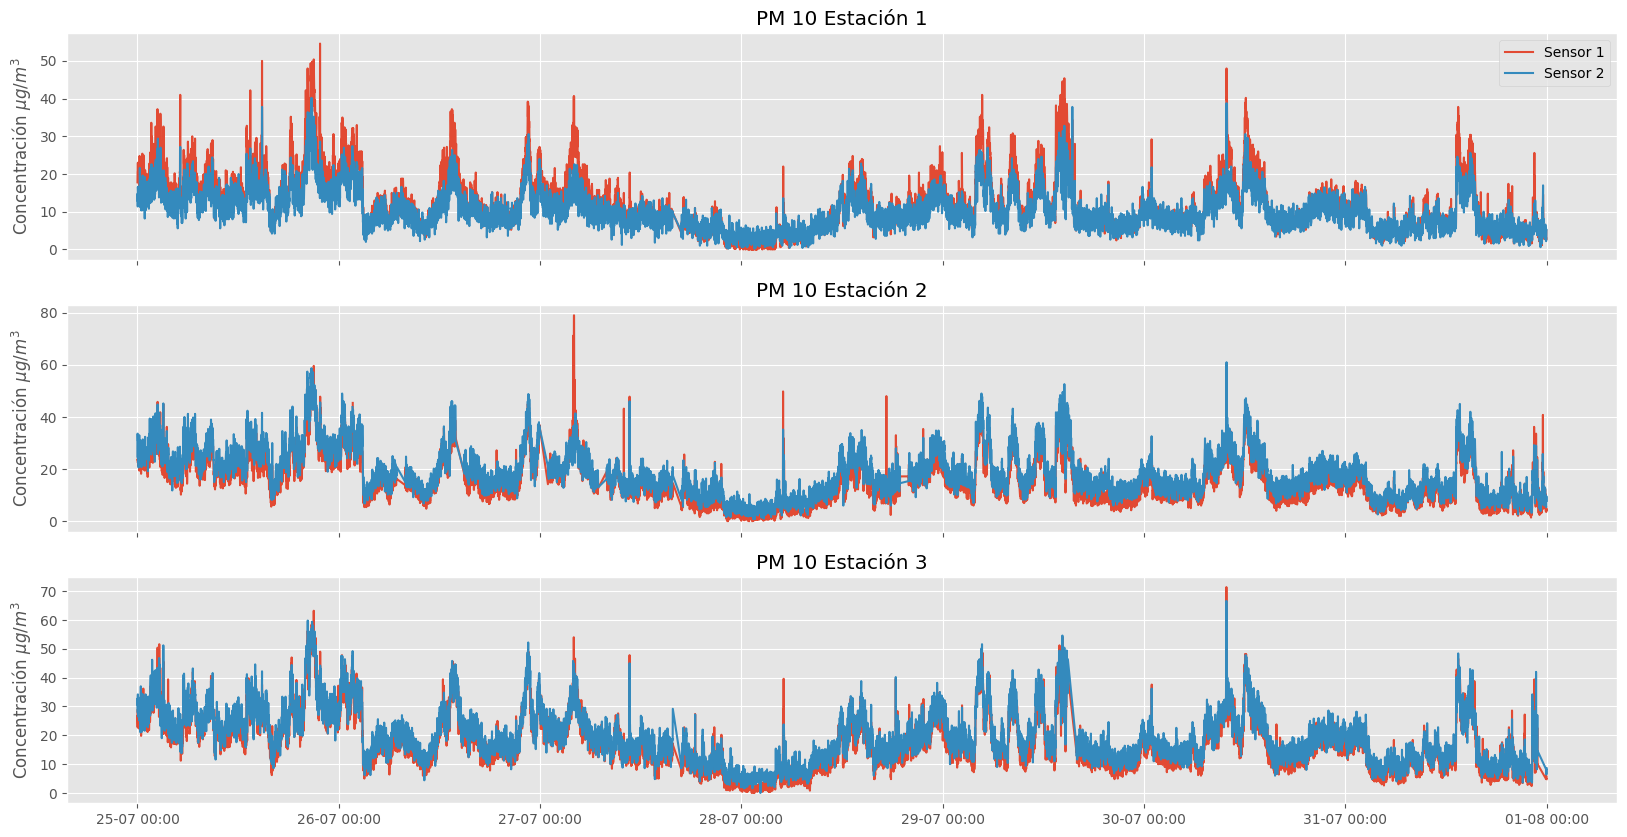

In [13]:
# Graficamos los datos por 24 horas
plt.style.use('ggplot')
fig, axs = plt.subplots(3,1,figsize=(20, 10))

axs[0].plot(data_21.index, data_21['pm10_1'], label='Sensor 1')
axs[0].plot(data_21.index, data_21['pm10_2'], label='Sensor 2')
axs[0].set_title('PM 10 Estación 1')
axs[0].set_ylabel('Concentración $ \mu g/m^3$')
axs[0].legend()
axs[0].set_xticklabels([])

axs[1].plot(data_22.index, data_22['pm10_1'], label='Sensor 1')
axs[1].plot(data_22.index, data_22['pm10_2'], label='Sensor 2')
axs[1].set_title('PM 10 Estación 2')
axs[1].set_ylabel('Concentración $ \mu g/m^3$')
# axs[1].legend()
axs[1].set_xticklabels([])

axs[2].plot(data_23.index, data_23['pm10_1'], label='Sensor 1')
axs[2].plot(data_23.index, data_23['pm10_2'], label='Sensor 2')
axs[2].set_title('PM 10 Estación 3')
axs[2].set_ylabel('Concentración $ \mu g/m^3$')
# axs[2].legend()
#Cambiamos el formato de las etiquetas del eje x
axs[2].xaxis.set_major_formatter(mdates.DateFormatter('%d-%m %H:%M'))

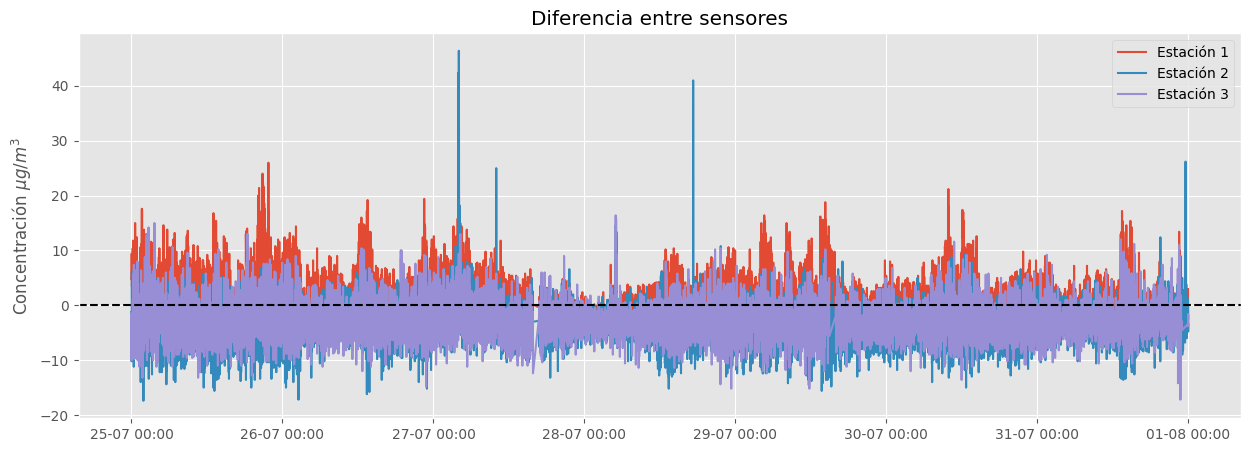

In [14]:
#Calculamos la diferencia entre cada sensor
names = ['pm1', 'pm10', 'pm25']
for name in names:
    data_21[name+'_diff'] = data_21[name+'_1'] - data_21[name+'_2']
    data_22[name+'_diff'] = data_22[name+'_1'] - data_22[name+'_2']
    data_23[name+'_diff'] = data_23[name+'_1'] - data_23[name+'_2']

#Graficamos la diferencia entre los sensores en un solo gráfico
fig, ax = plt.subplots(figsize=(15, 5))
ax.plot(data_21.index, data_21['pm10_diff'], label='Estación 1')
ax.plot(data_22.index, data_22['pm10_diff'], label='Estación 2')
ax.plot(data_23.index, data_23['pm10_diff'], label='Estación 3')
ax.set_title('Diferencia entre sensores')
ax.set_ylabel('Concentración $ \mu g/m^3$')
ax.legend()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m %H:%M'))
#Trazamos una línea en el eje y = 0
ax.axhline(y=0, color='k', linestyle='--')

In [15]:
#Calculamos la media cuadrática entre los sensores
media_cuadratica = {}
for name in names:
    media_cuadratica[name+'_21'] = np.sqrt(np.mean(data_21[name+'_diff']**2))
    media_cuadratica[name+'_22'] = np.sqrt(np.mean(data_22[name+'_diff']**2))
    media_cuadratica[name+'_23'] = np.sqrt(np.mean(data_23[name+'_diff']**2))


In [16]:
print("La diferencia promedio entre los sensores de la estación 1 es: ", round(data_21['pm25_diff'].mean(), 2), "ug/m3. \nLa media cuadrática es: ", round(media_cuadratica['pm10_21'], 2), "ug/m3")
print("La diferencia promedio entre los sensores de la estación 2 es: ", round(data_22['pm25_diff'].mean(), 2), "ug/m3. \nLa media cuadrática es: ", round(media_cuadratica['pm10_22'], 2), "ug/m3")
print("La diferencia promedio entre los sensores de la estación 3 es: ", round(data_23['pm25_diff'].mean(), 2), "ug/m3. \nLa media cuadrática es: ", round(media_cuadratica['pm10_23'], 2), "ug/m3")

La diferencia promedio entre los sensores de la estación 1 es:  2.16 ug/m3. 
La media cuadrática es:  4.33 ug/m3
La diferencia promedio entre los sensores de la estación 2 es:  -3.63 ug/m3. 
La media cuadrática es:  5.26 ug/m3
La diferencia promedio entre los sensores de la estación 3 es:  -2.67 ug/m3. 
La media cuadrática es:  4.38 ug/m3


In [9]:
#Creamos un dataframe que resuma los datos de la celda anterior pero para cada pm
df = pd.DataFrame(media_cuadratica, index=['media_cuadratica'])
df = df.T
df['diferencia_promedio'] = [data_21['pm1_diff'].mean(), data_22['pm1_diff'].mean(), data_23['pm1_diff'].mean(),
                             data_21['pm25_diff'].mean(), data_22['pm25_diff'].mean(), data_23['pm25_diff'].mean(),
                                data_21['pm10_diff'].mean(), data_22['pm10_diff'].mean(), data_23['pm10_diff'].mean()]
df['diferencia_promedio'] = df['diferencia_promedio'].round(2)
df['media_cuadratica'] = df['media_cuadratica'].round(2)
df

,media_cuadratica,diferencia_promedio
pm1_21,2.40,-0.01
pm1_22,5.31,-4.79
pm1_23,3.73,-2.97
pm10_21,4.33,2.16
pm10_22,5.26,-3.63
pm10_23,4.38,-2.67
pm25_21,4.17,2.15
pm25_22,4.70,-3.76
pm25_23,3.99,-2.65


### Calibración de estaciones

Ahora que vimos que las estaciones toman datos similares, podemos promediarlos y trabajar con un solo dato por estación.

In [32]:
#Sacamos una columna promedio
for name in names:
    data_21[name] = np.mean(data_21[[name+'_1', name+'_2']], axis=1)
    data_22[name] = np.mean(data_22[[name+'_1', name+'_2']], axis=1)
    data_23[name] = np.mean(data_23[[name+'_1', name+'_2']], axis=1)


Como cada sensor trabaja diferente, no podemos promediarlos, así que haremos el respectivo análisis para cada uno de ellos.

In [64]:
#Calculemos la diferencia entre las estaciones en un nuevo dataframe
data_diff_estaciones = pd.DataFrame()
for column in data_23.columns:
    data_diff_estaciones[column] = data_23[column] - data_22[column]

#Lo mismo para la media cuadrática
data_std_estaciones = pd.DataFrame()
for column in data_diff_estaciones.columns:
    data_std_estaciones[column] = data_diff_estaciones[column].std()

#Eliminamos las 3 ultimas columnas que no nos interesan
data_diff_estaciones = data_diff_estaciones.iloc[:,:-6].dropna()
# data_std_estaciones = data_std_estaciones.iloc[:-6]
data_diff_estaciones

,pm1_1,pm1_2,pm10_1,pm10_2,pm25_1,pm25_2
2023-07-25 00:00:00,7.400001,1.600000,3.000000,3.400002,7.400002,3.600001
2023-07-25 00:01:00,2.799999,0.400000,-0.600001,-0.799999,0.399999,0.399999
2023-07-25 00:02:00,6.000001,-1.600001,5.600000,-0.600000,5.600000,0.800000
2023-07-25 00:03:00,2.600000,2.000000,4.000000,3.200001,3.399999,3.199999
2023-07-25 00:04:00,3.600000,1.000000,-5.000000,3.800001,-4.000000,2.400000
...,...,...,...,...,...,...
2023-07-31 22:55:00,2.400000,1.200000,2.600000,3.400000,0.600000,1.200000
2023-07-31 23:56:00,1.200000,2.600000,-0.800000,2.800000,-0.200000,2.600000
2023-07-31 23:57:00,0.800000,0.800000,2.400000,0.800000,0.400000,0.800000
2023-07-31 23:58:00,0.200000,-4.600000,0.000000,-3.200000,-1.000000,-3.200000


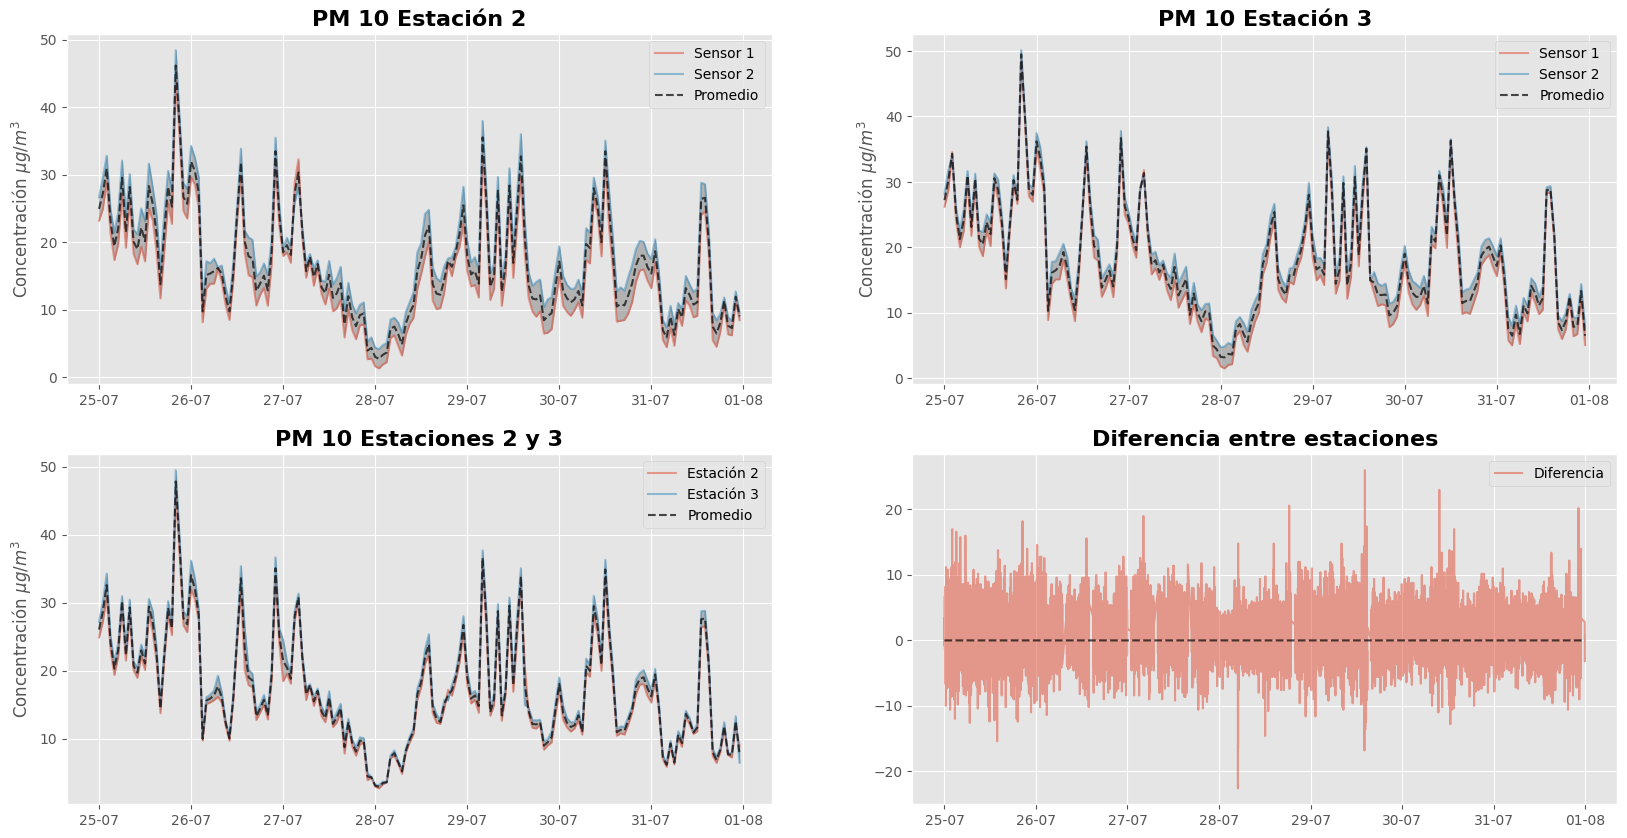

In [36]:
#Hacemos un suavizado por hora 
data_21_hora = data_21.resample('H').mean().copy()
data_22_hora = data_22.resample('H').mean().copy()
data_23_hora = data_23.resample('H').mean().copy()

#Graficamos los datos por hora
fig, axs = plt.subplots(2,2,figsize=(20, 10))

axs[0,0].plot(data_22_hora.index, data_22_hora['pm10_1'], label='Sensor 1', alpha=0.5)
axs[0,0].plot(data_22_hora.index, data_22_hora['pm10_2'], label='Sensor 2', alpha=0.5)
axs[0,0].fill_between(data_22_hora.index, data_22_hora['pm10_1'], data_22_hora['pm10_2'], alpha=0.5, color='grey')
axs[0,0].plot(data_22_hora.index, data_22_hora['pm10'], "--", label='Promedio', alpha=0.7, color='k')
axs[0,0].set_title('PM 10 Estación 2', fontsize=16, fontweight='bold')
axs[0,0].set_ylabel('Concentración $ \mu g/m^3$')

axs[0,0].legend()
# axs[0,0].set_xticklabels([])
axs[0,0].xaxis.set_major_formatter(mdates.DateFormatter('%d-%m'))


axs[0,1].plot(data_23_hora.index, data_23_hora['pm10_1'], label='Sensor 1', alpha=0.5)
axs[0,1].plot(data_23_hora.index, data_23_hora['pm10_2'], label='Sensor 2', alpha=0.5)
axs[0,1].fill_between(data_23_hora.index, data_23_hora['pm10_1'], data_23_hora['pm10_2'], alpha=0.5, color='grey')
axs[0,1].plot(data_23_hora.index, data_23_hora['pm10'], "--", label='Promedio', alpha=0.7, color='k')
axs[0,1].set_title('PM 10 Estación 3', fontsize=16, fontweight='bold')
axs[0,1].set_ylabel('Concentración $ \mu g/m^3$')
axs[0,1].legend()
axs[0,1].set_xticklabels([])
axs[0,1].xaxis.set_major_formatter(mdates.DateFormatter('%d-%m'))


axs[1,0].plot(data_22_hora.index, data_22_hora['pm10'], label='Estación 2', alpha=0.5)
axs[1,0].plot(data_23_hora.index, data_23_hora['pm10'], label='Estación 3', alpha=0.5)
axs[1,0].fill_between(data_22_hora.index, data_22_hora['pm10'], data_23_hora['pm10'], alpha=0.5, color='grey')
#Promedio entre las estaciones
promedio = np.mean([data_22_hora['pm10'], data_23_hora['pm10']], axis=0)
axs[1,0].plot(data_22_hora.index, promedio, "--", label='Promedio', alpha=0.7, color='k')
axs[1,0].set_title('PM 10 Estaciones 2 y 3', fontsize=16, fontweight='bold')
axs[1,0].set_ylabel('Concentración $ \mu g/m^3$')
axs[1,0].legend()
#Cambiamos el formato de las etiquetas del eje x
axs[1,0].xaxis.set_major_formatter(mdates.DateFormatter('%d-%m'))
# axs[1, 0].xaxis.set_major_locator(mdates.HourLocator(interval=12))

#Graficamos la diferencia entre las estaciones
axs[1,1].plot(data_diff_estaciones.index, data_diff_estaciones['pm10_2'], label='Diferencia', alpha=0.5)
axs[1,1].plot(data_diff_estaciones.index, np.zeros(len(data_diff_estaciones)), "--", alpha=0.7, color='k')
axs[1,1].set_title('Diferencia entre estaciones', fontsize=16, fontweight='bold')
axs[1,1].legend()
#Cambiamos el formato de las etiquetas del eje x
axs[1,1].xaxis.set_major_formatter(mdates.DateFormatter('%d-%m'))
# axs[1, 1].xaxis.set_major_locator(mdates.HourLocator(interval=12))


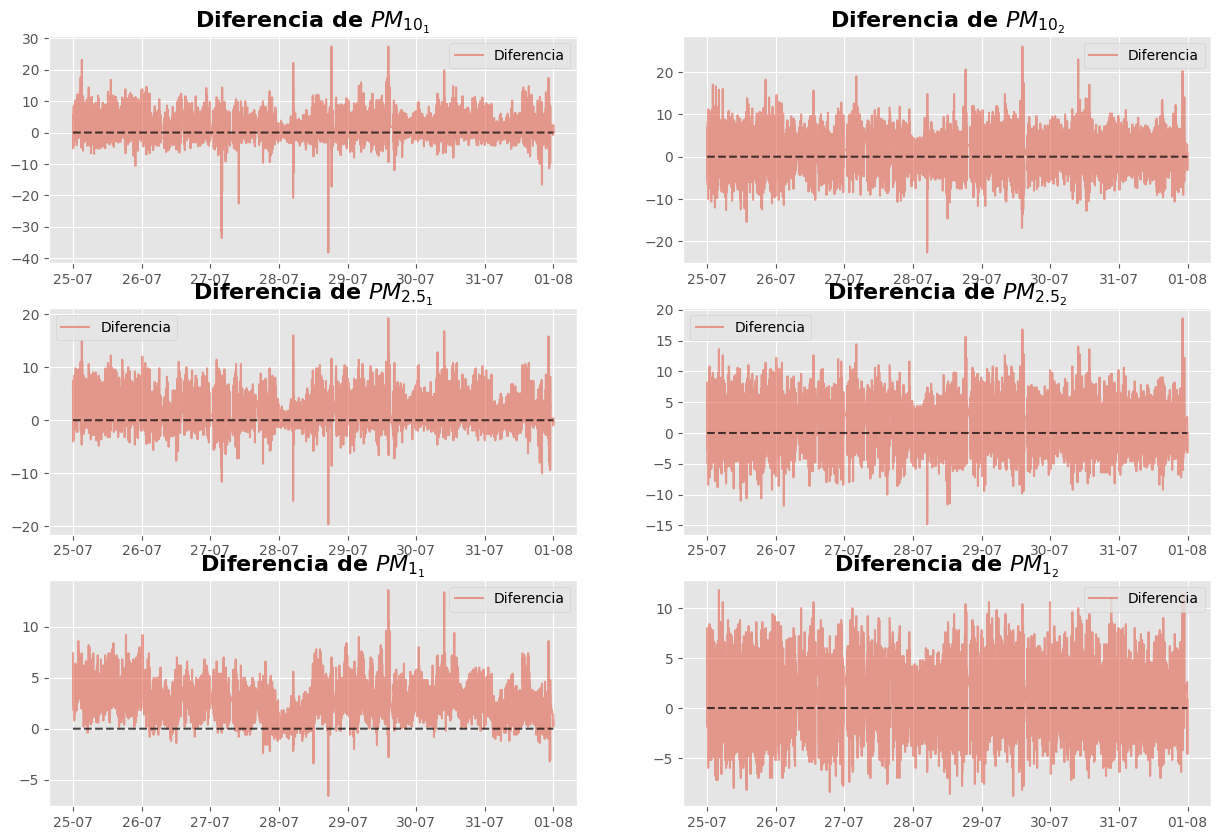

In [41]:
#Graficamos todas las diferencias de los modelos
fig, axs = plt.subplots(3, 2, figsize=(15, 10))

axs[0,0].plot(data_diff_estaciones.index, data_diff_estaciones['pm10_1'], label='Diferencia', alpha=0.5)
axs[0,0].plot(data_diff_estaciones.index, np.zeros(len(data_diff_estaciones)), "--", alpha=0.7, color='k')
axs[0,0].set_title('Diferencia de $PM_{10_1}$', fontsize=16, fontweight='bold')
axs[0,0].legend()
#Cambiamos el formato de las etiquetas del eje x
axs[0,0].xaxis.set_major_formatter(mdates.DateFormatter('%d-%m'))

axs[0,1].plot(data_diff_estaciones.index, data_diff_estaciones['pm10_2'], label='Diferencia', alpha=0.5)
axs[0,1].plot(data_diff_estaciones.index, np.zeros(len(data_diff_estaciones)), "--", alpha=0.7, color='k')
axs[0,1].set_title('Diferencia de $PM_{10_2}$', fontsize=16, fontweight='bold')
axs[0,1].legend()
axs[0,1].xaxis.set_major_formatter(mdates.DateFormatter('%d-%m'))

axs[1,0].plot(data_diff_estaciones.index, data_diff_estaciones['pm25_1'], label='Diferencia', alpha=0.5)
axs[1,0].plot(data_diff_estaciones.index, np.zeros(len(data_diff_estaciones)), "--", alpha=0.7, color='k')
axs[1,0].set_title('Diferencia de $PM_{2.5_1}$', fontsize=16, fontweight='bold')
axs[1,0].legend()
axs[1,0].xaxis.set_major_formatter(mdates.DateFormatter('%d-%m'))

axs[1,1].plot(data_diff_estaciones.index, data_diff_estaciones['pm25_2'], label='Diferencia', alpha=0.5)
axs[1,1].plot(data_diff_estaciones.index, np.zeros(len(data_diff_estaciones)), "--", alpha=0.7, color='k')
axs[1,1].set_title('Diferencia de $PM_{2.5_2}$', fontsize=16, fontweight='bold')
axs[1,1].legend()
axs[1,1].xaxis.set_major_formatter(mdates.DateFormatter('%d-%m'))

axs[2,0].plot(data_diff_estaciones.index, data_diff_estaciones['pm1_1'], label='Diferencia', alpha=0.5)
axs[2,0].plot(data_diff_estaciones.index, np.zeros(len(data_diff_estaciones)), "--", alpha=0.7, color='k')
axs[2,0].set_title('Diferencia de $PM_{1_1}$', fontsize=16, fontweight='bold')
axs[2,0].legend()
axs[2,0].xaxis.set_major_formatter(mdates.DateFormatter('%d-%m'))

axs[2,1].plot(data_diff_estaciones.index, data_diff_estaciones['pm1_2'], label='Diferencia', alpha=0.5)
axs[2,1].plot(data_diff_estaciones.index, np.zeros(len(data_diff_estaciones)), "--", alpha=0.7, color='k')
axs[2,1].set_title('Diferencia de $PM_{1_2}$', fontsize=16, fontweight='bold')
axs[2,1].legend()
axs[2,1].xaxis.set_major_formatter(mdates.DateFormatter('%d-%m'))





In [44]:
#Creamos un dataframe que resuma los datos obtenidos

df = pd.DataFrame(data_std_estaciones, index = ["media_cuadratica"])
data_std_estaciones

,pm1_1,pm1_2,pm10_1,pm10_2,pm25_1,pm25_2,pm1_diff,pm10_diff,pm25_diff


Como las estaciones 22 y 23 están consecutivas, vamos a trabajar con esos datos.

In [83]:
#Calculemos la diferencia entre las estaciones en un nuevo dataframe
data_diff = pd.DataFrame()
for name in names:
    data_diff[name] = data_23[name] - data_22[name]

#Ahora la media cuadrática
media_cuadratica_estaciones = {}
for name in names:
    media_cuadratica_estaciones[name] = np.sqrt(np.mean(data_diff[name]**2))

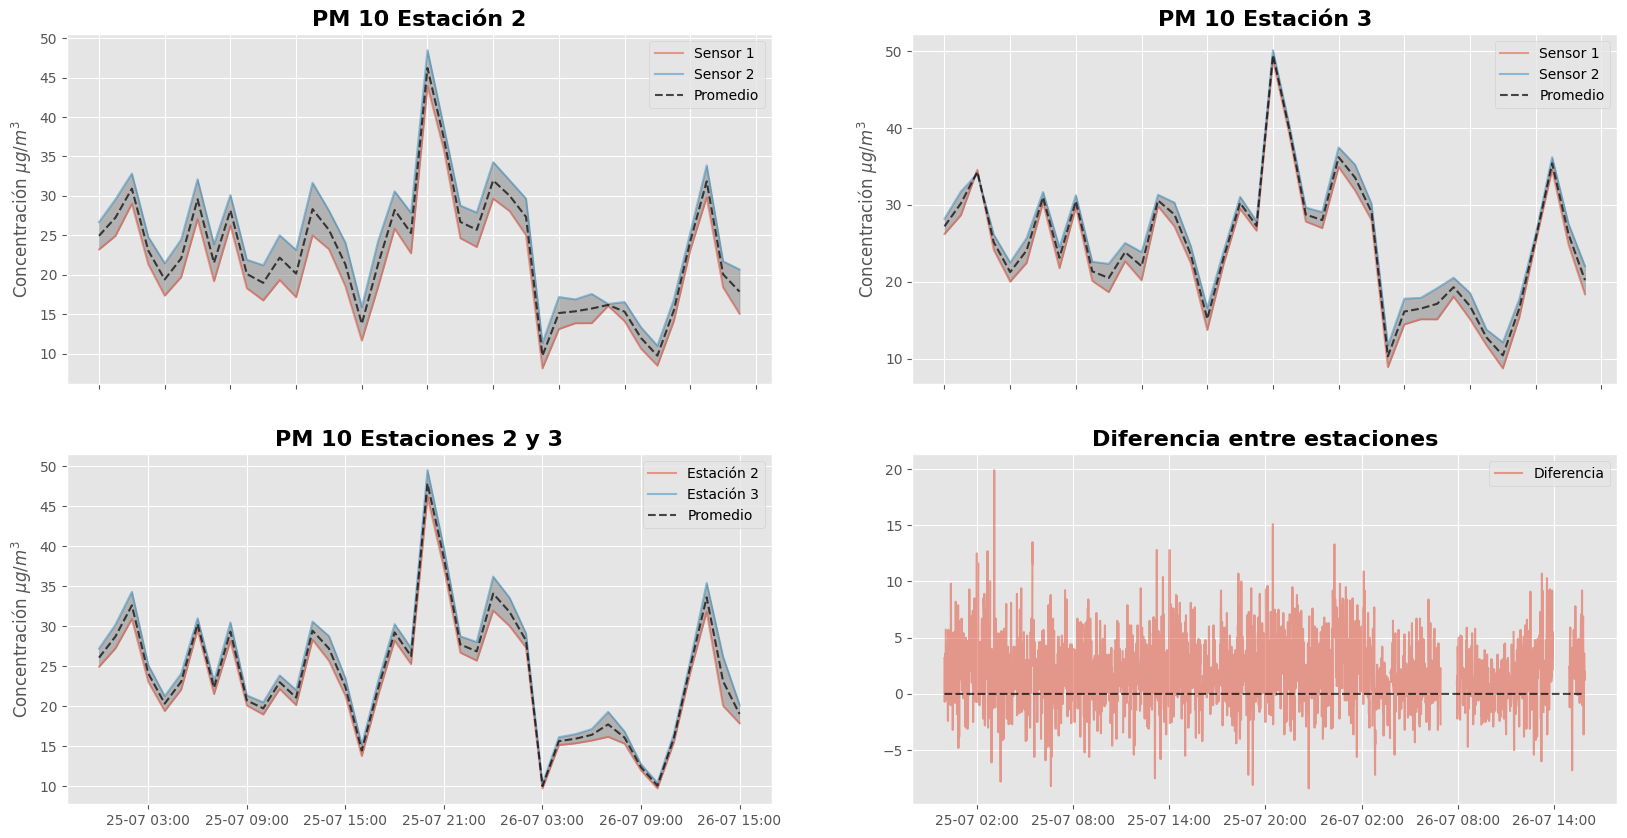

In [102]:
#Hacemos un suavizado por hora
data_21_hora = data_21.resample('H').mean().copy()
data_22_hora = data_22.resample('H').mean().copy()
data_23_hora = data_23.resample('H').mean().copy()

#Graficamos los datos por hora
fig, axs = plt.subplots(2,2,figsize=(20, 10))

axs[0,0].plot(data_22_hora.index, data_22_hora['pm10_1'], label='Sensor 1', alpha=0.5)
axs[0,0].plot(data_22_hora.index, data_22_hora['pm10_2'], label='Sensor 2', alpha=0.5)
axs[0,0].fill_between(data_22_hora.index, data_22_hora['pm10_1'], data_22_hora['pm10_2'], alpha=0.5, color='grey')
axs[0,0].plot(data_22_hora.index, data_22_hora['pm10'], "--", label='Promedio', alpha=0.7, color='k')
axs[0,0].set_title('PM 10 Estación 2', fontsize=16, fontweight='bold')
axs[0,0].set_ylabel('Concentración $ \mu g/m^3$')

axs[0,0].legend()
axs[0,0].set_xticklabels([])

axs[0,1].plot(data_23_hora.index, data_23_hora['pm10_1'], label='Sensor 1', alpha=0.5)
axs[0,1].plot(data_23_hora.index, data_23_hora['pm10_2'], label='Sensor 2', alpha=0.5)
axs[0,1].fill_between(data_23_hora.index, data_23_hora['pm10_1'], data_23_hora['pm10_2'], alpha=0.5, color='grey')
axs[0,1].plot(data_23_hora.index, data_23_hora['pm10'], "--", label='Promedio', alpha=0.7, color='k')
axs[0,1].set_title('PM 10 Estación 3', fontsize=16, fontweight='bold')
axs[0,1].set_ylabel('Concentración $ \mu g/m^3$')
axs[0,1].legend()
axs[0,1].set_xticklabels([])

axs[1,0].plot(data_22_hora.index, data_22_hora['pm10'], label='Estación 2', alpha=0.5)
axs[1,0].plot(data_23_hora.index, data_23_hora['pm10'], label='Estación 3', alpha=0.5)
axs[1,0].fill_between(data_22_hora.index, data_22_hora['pm10'], data_23_hora['pm10'], alpha=0.5, color='grey')
#Promedio entre las estaciones
promedio = np.mean([data_22_hora['pm10'], data_23_hora['pm10']], axis=0)
axs[1,0].plot(data_22_hora.index, promedio, "--", label='Promedio', alpha=0.7, color='k')
axs[1,0].set_title('PM 10 Estaciones 2 y 3', fontsize=16, fontweight='bold')
axs[1,0].set_ylabel('Concentración $ \mu g/m^3$')
axs[1,0].legend()
#Cambiamos el formato de las etiquetas del eje x
axs[1,0].xaxis.set_major_formatter(mdates.DateFormatter('%d-%m %H:%M'))
axs[1, 0].xaxis.set_major_locator(mdates.HourLocator(interval=6))

#Graficamos la diferencia entre las estaciones
axs[1,1].plot(data_diff.index, data_diff['pm10'], label='Diferencia', alpha=0.5)
axs[1,1].plot(data_diff.index, np.zeros(len(data_diff)), "--", alpha=0.7, color='k')
axs[1,1].set_title('Diferencia entre estaciones', fontsize=16, fontweight='bold')
axs[1,1].legend()
#Cambiamos el formato de las etiquetas del eje x
axs[1,1].xaxis.set_major_formatter(mdates.DateFormatter('%d-%m %H:%M'))
axs[1, 1].xaxis.set_major_locator(mdates.HourLocator(interval=6))


In [85]:
#Creamos un dataframe que resuma los datos
df = pd.DataFrame(media_cuadratica_estaciones, index=['media_cuadratica'])
df = df.T
df['media_cuadratica'] = df['media_cuadratica'].round(2)
#La diferencia promedio
df['diferencia_promedio'] = data_diff['pm10'].mean().round(2)
df



,media_cuadratica,diferencia_promedio
pm1,2.90,1.97
pm10,3.57,1.97
pm25,3.13,1.97


### Análisis dependencia a muros cercanos

La estación 21 está tomando datos estando cerca a un muro, por lo que es posible que los datos se vean afectados por la cercanía a este. Para analizar esto, vamos a comparar los datos de la estación 21 con los de la estación 22, que está en "condiciones normales".

In [76]:
#Trabajamos sin promediar los datos y comparamos los resultados

data_21_30min = data_21.resample('30min').mean().copy()
data_22_30min = data_22.resample('30min').mean().copy()

#Si una estación tiene datos faltantes, eliminamos el correspondiente a la otra estación
for name in names:
    data_21_30min[name] = data_21_30min[name][data_22_30min[name].notnull()]
    data_22_30min[name] = data_22_30min[name][data_22_30min[name].notnull()]



Index(['pm1_1', 'pm1_2', 'pm10_1', 'pm10_2', 'pm25_1', 'pm25_2', 'pm1_diff',
       'pm10_diff', 'pm25_diff', 'pm1', 'pm10', 'pm25'],
      dtype='object')

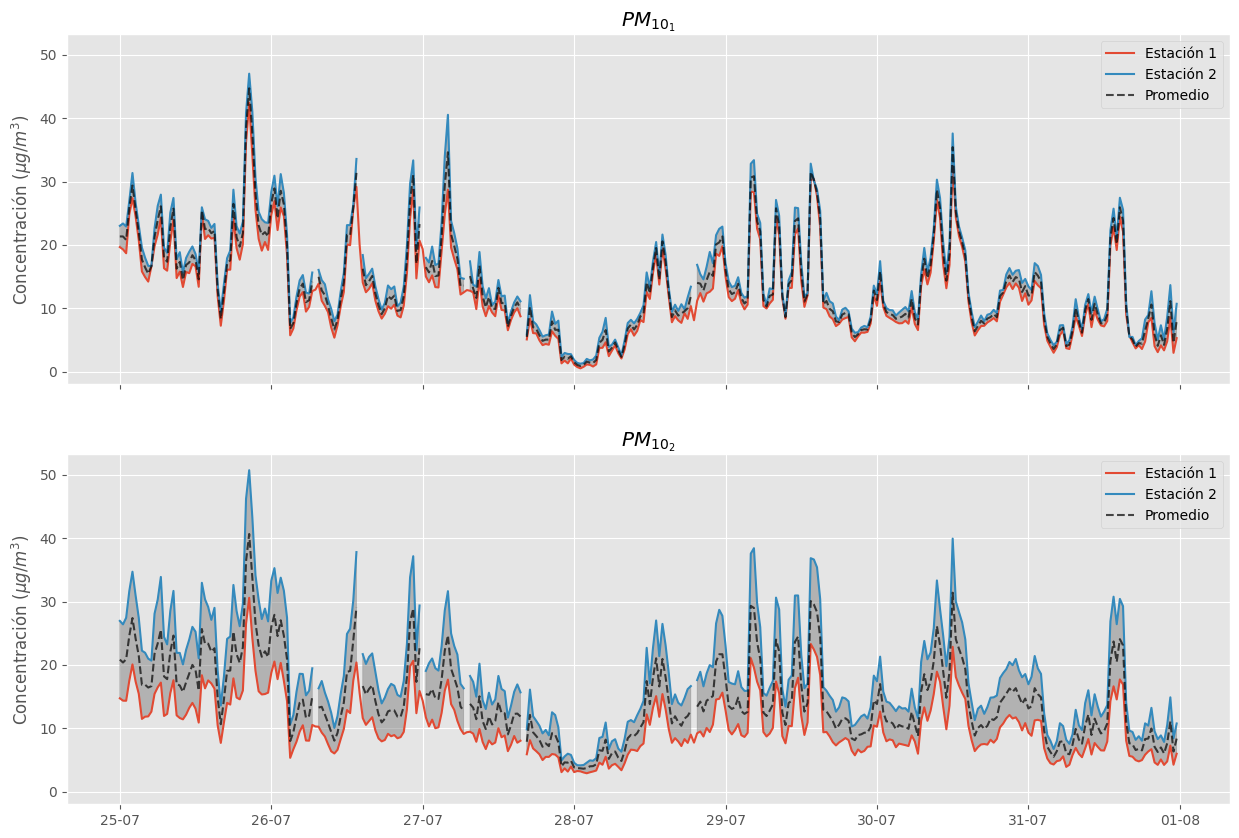

In [81]:
#Graficamos el comportamiento de cada sensor con su correspondiente

plt.style.use('ggplot')

fig, axs = plt.subplots(2, 1, figsize=(15, 10), sharex=True, sharey=True)

axs[0].plot(data_21_30min.index, data_21_30min['pm10_1'], label='Estación 1')
axs[0].plot(data_22_30min.index, data_22_30min['pm10_1'], label='Estación 2')
axs[0].fill_between(data_21_30min.index, data_21_30min['pm10_1'], data_22_30min['pm10_1'], alpha=0.5, color = 'grey')
promedio = (data_21_30min['pm10_1'] + data_22_30min['pm10_1'])/2
axs[0].plot(data_21_30min.index, promedio, "--", label='Promedio', alpha=0.7, color='black')
axs[0].set_title('$PM_{10_1}$')
axs[0].set_ylabel('Concentración ($\mu g/m^3$)')
axs[0].legend()
axs[0].xaxis.set_major_formatter(mdates.DateFormatter('%d-%m'))

axs[1].plot(data_21_30min.index, data_21_30min['pm10_2'], label='Estación 1')
axs[1].plot(data_22_30min.index, data_22_30min['pm10_2'], label='Estación 2')
axs[1].fill_between(data_21_30min.index, data_21_30min['pm10_2'], data_22_30min['pm10_2'], alpha=0.5, color = 'grey')
promedio = (data_21_30min['pm10_2'] + data_22_30min['pm10_2'])/2
axs[1].plot(data_21_30min.index, promedio, "--", label='Promedio', alpha=0.7, color='black')
axs[1].set_title('$PM_{10_2}$')
axs[1].set_ylabel('Concentración ($\mu g/m^3$)')
axs[1].legend()
axs[1].xaxis.set_major_formatter(mdates.DateFormatter('%d-%m'))



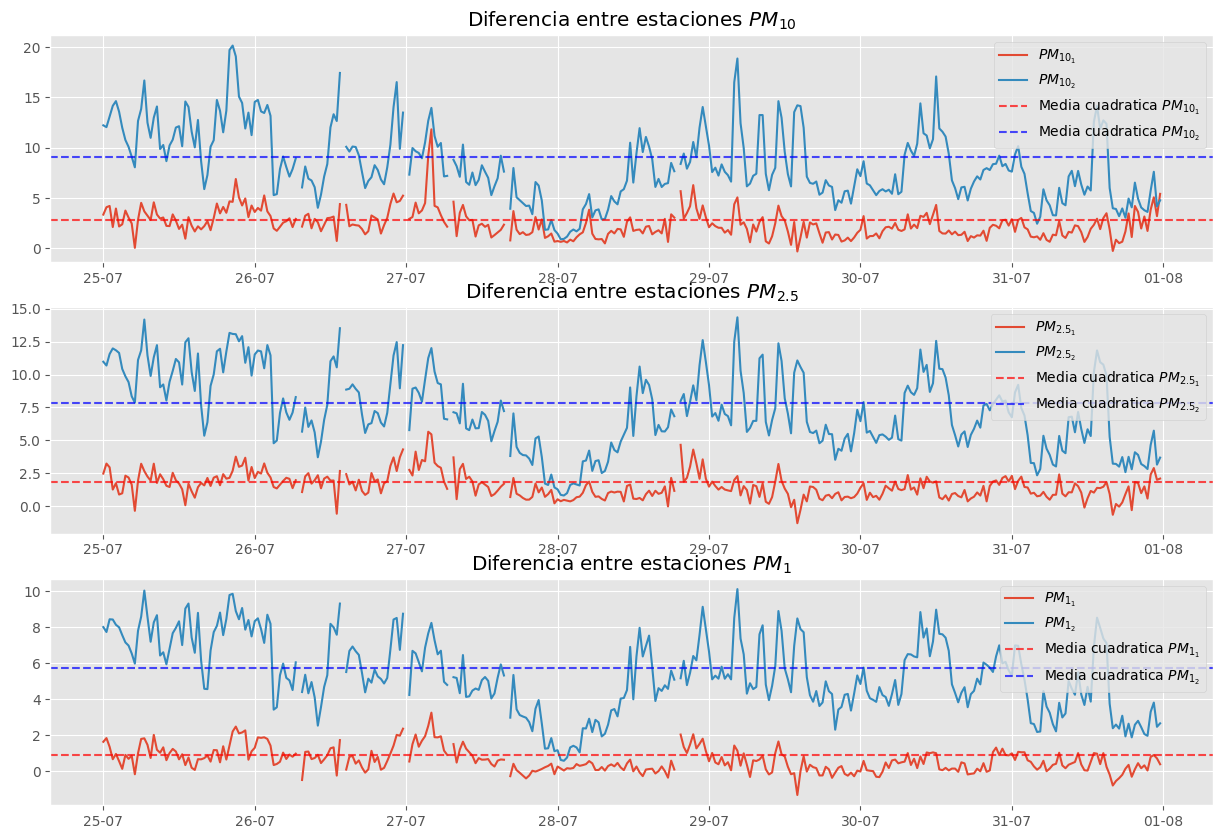

In [89]:
#Calculamos la diferencia entre estaciones y graficamos

data_diff_muro = pd.DataFrame()
for comlum in data_22_30min.columns:
    data_diff_muro[comlum] = data_22_30min[comlum] - data_21_30min[comlum]

#Eliminamos las ultimas 3 columnas que no son necesarias
data_diff_muro = data_diff_muro.iloc[:, :-6]
media_cuadratica_muro = {}
for comlum in data_diff_muro.columns:
    media_cuadratica_muro[comlum] = np.sqrt(np.mean(data_diff_muro[comlum]**2))
    media_cuadratica_muro[column] = np.sqrt(np.mean(data_diff_muro[column]**2))



#Graficamos la diferencia entre estaciones
fig, axs = plt.subplots(3, 1, figsize=(15, 10))

axs[0].plot(data_diff_muro.index, data_diff_muro['pm10_1'], label='$PM_{10_1}$')
axs[0].plot(data_diff_muro.index, data_diff_muro['pm10_2'], label='$PM_{10_2}$')
axs[0].set_title('Diferencia entre estaciones $PM_{10}$')
axs[0].axhline(y=media_cuadratica_muro['pm10_1'], color='r', linestyle='--', label='Media cuadratica $PM_{10_1}$', alpha=0.7)
axs[0].axhline(y=media_cuadratica_muro['pm10_2'], color='b', linestyle='--', label='Media cuadratica $PM_{10_2}$', alpha=0.7)
axs[0].legend()
axs[0].xaxis.set_major_formatter(mdates.DateFormatter('%d-%m'))

axs[1].plot(data_diff_muro.index, data_diff_muro['pm25_1'], label='$PM_{2.5_1}$')
axs[1].plot(data_diff_muro.index, data_diff_muro['pm25_2'], label='$PM_{2.5_2}$')
axs[1].set_title('Diferencia entre estaciones $PM_{2.5}$')
axs[1].axhline(y=media_cuadratica_muro['pm25_1'], color='r', linestyle='--', label='Media cuadratica $PM_{2.5_1}$', alpha=0.7)
axs[1].axhline(y=media_cuadratica_muro['pm25_2'], color='b', linestyle='--', label='Media cuadratica $PM_{2.5_2}$', alpha=0.7)
axs[1].legend()
axs[1].xaxis.set_major_formatter(mdates.DateFormatter('%d-%m'))

axs[2].plot(data_diff_muro.index, data_diff_muro['pm1_1'], label='$PM_{1_1}$')
axs[2].plot(data_diff_muro.index, data_diff_muro['pm1_2'], label='$PM_{1_2}$')
axs[2].set_title('Diferencia entre estaciones $PM_{1}$')
axs[2].axhline(y=media_cuadratica_muro['pm1_1'], color='r', linestyle='--', label='Media cuadratica $PM_{1_1}$', alpha=0.7)
axs[2].axhline(y=media_cuadratica_muro['pm1_2'], color='b', linestyle='--', label='Media cuadratica $PM_{1_2}$', alpha=0.7)
axs[2].legend()
axs[2].xaxis.set_major_formatter(mdates.DateFormatter('%d-%m'))


In [86]:
data_21.head()

,pm1_1,pm1_2,pm10_1,pm10_2,pm25_1,pm25_2,pm1_diff,pm10_diff,pm25_diff,pm1,pm10,pm25
2023-07-25 00:00:00,12.0,8.4,17.799999,13.0,17.600000,12.4,3.6,4.799999,5.200000,10.2,15.399999,15.000000
2023-07-25 00:01:00,13.2,8.6,20.600000,14.8,20.400000,14.4,4.6,5.800000,6.000000,10.9,17.700000,17.400000
2023-07-25 00:02:00,11.4,8.2,20.799999,11.4,19.799999,10.4,3.2,9.399999,9.399999,9.8,16.099999,15.099999
2023-07-25 00:03:00,13.0,11.2,23.000000,16.6,22.000000,15.6,1.8,6.400000,6.400000,12.1,19.800000,18.800000
2023-07-25 00:04:00,11.0,12.0,19.200001,15.8,19.000000,15.6,-1.0,3.400001,3.400000,11.5,17.500000,17.300000


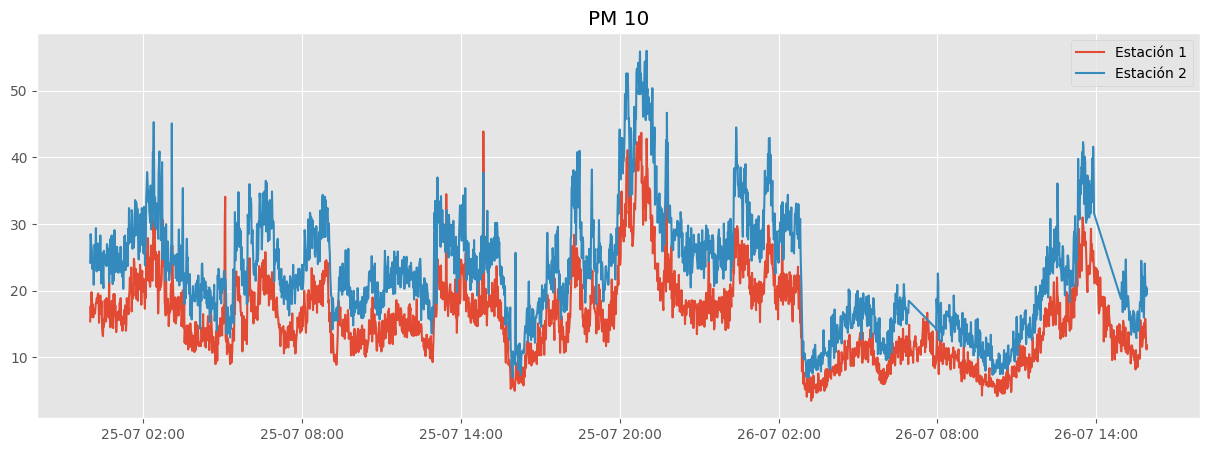

In [87]:
# Podemos graficar los datos de las dos estaciones para tener una primera aproximación. Vamos a trabajar con el promedio de los dos sensores y con el pm10
plt.style.use('ggplot')

fig, ax = plt.subplots(figsize=(15, 5))

ax.plot(data_21.index, data_21['pm10'], label='Estación 1')
ax.plot(data_22.index, data_22['pm10'], label='Estación 2')
ax.set_title('PM 10')
ax.set_ylabel('Concentración $ \mu g/m^3$')

ax.legend()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m %H:%M'))
ax.xaxis.set_major_locator(mdates.HourLocator(interval=6))



In [115]:
#Trabajemos con el promedio de cada media hora, usando las columnas que nos interesan
data_21_30min = data_21[['pm1', 'pm10', 'pm25']].resample('30min').mean().copy()
data_22_30min = data_22[['pm1', 'pm10', 'pm25']].resample('30min').mean().copy()

#Si una estación tiene datos faltantes, eliminamos el correspondiente de la otra estación
for name in names:
    data_21_30min[name] = data_21_30min[name][data_22_30min[name].notnull()]
    data_22_30min[name] = data_22_30min[name][data_22_30min[name].notnull()]


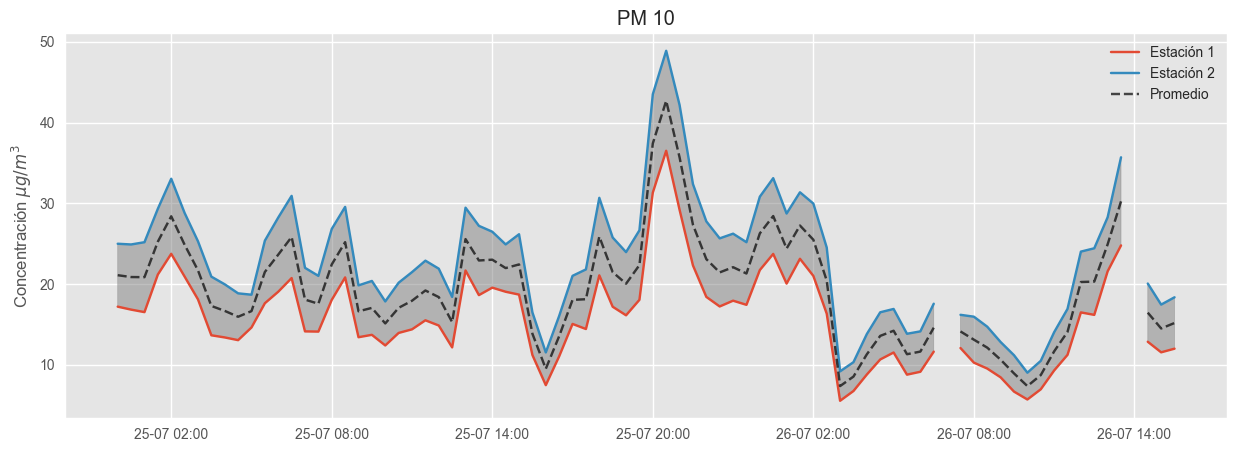

In [117]:
#Volvemos a graficar las estaciones
plt.style.use('ggplot')
fig, ax = plt.subplots(figsize=(15, 5))

ax.plot(data_21_30min.index, data_21_30min['pm10'], label='Estación 1')
ax.plot(data_22_30min.index, data_22_30min['pm10'], label='Estación 2')
ax.fill_between(data_21_30min.index, data_21_30min['pm10'], data_22_30min['pm10'], alpha=0.5, color='grey')
#Promedio entre las estaciones
promedio = np.mean([data_21_30min['pm10'], data_22_30min['pm10']], axis=0)
ax.plot(data_21_30min.index, promedio, "--", label='Promedio', alpha=0.7, color='k')
ax.set_title('PM 10')
ax.set_ylabel('Concentración $ \mu g/m^3$')
ax.legend()
#Cambiamos el formato de las etiquetas del eje x
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m %H:%M'))
ax.xaxis.set_major_locator(mdates.HourLocator(interval=6))



C:\Users\Brayan\AppData\Local\Temp\ipykernel_23912\3477740881.py:15: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


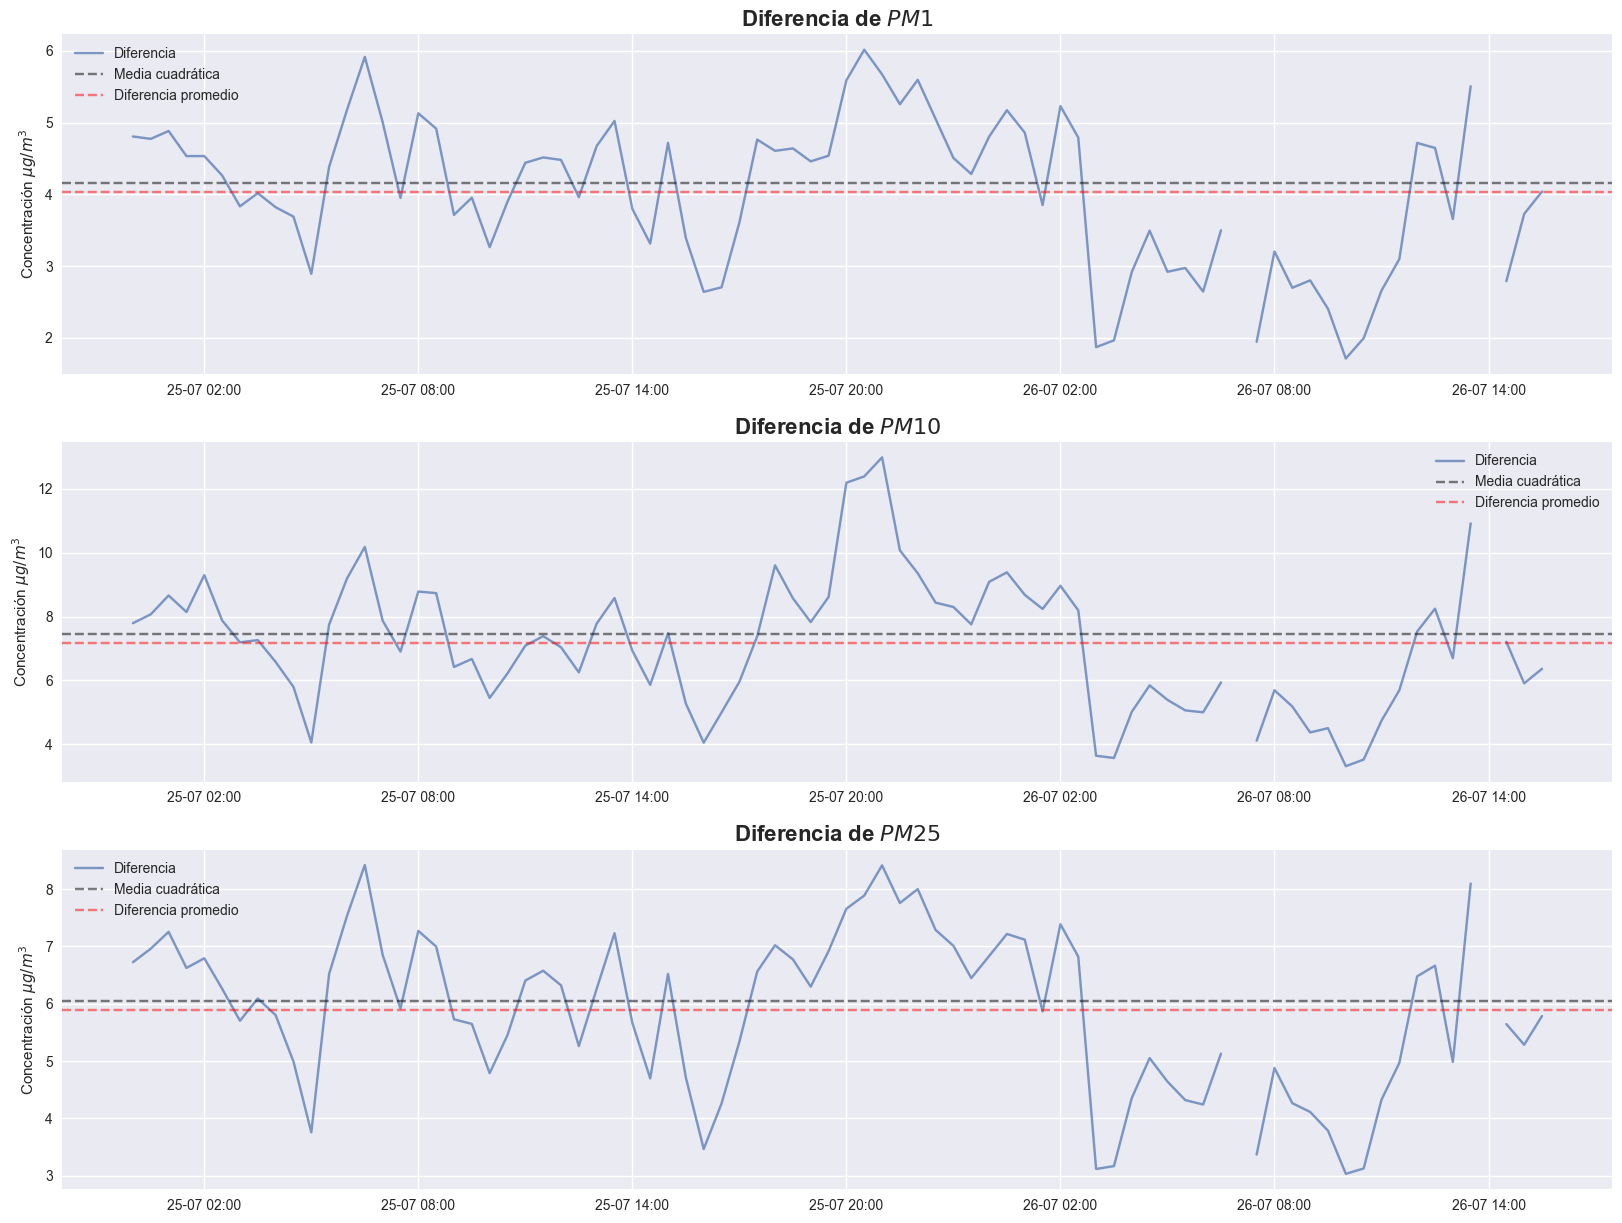

In [126]:
#Calculemos la diferencia entre estaciones y grafiquemos, despues calculemos la media cuadrática
data_diff_muro = pd.DataFrame()
for name in names:
    data_diff_muro[name] = data_22_30min[name] - data_21_30min[name]

diff_muro_prom = {}
for name in names:
    diff_muro_prom[name] = data_diff_muro[name].mean()

#Ahora la media cuadrática
media_cuadratica_muro = {}
for name in names:
    media_cuadratica_muro[name] = np.sqrt(np.mean(data_diff_muro[name]**2))

plt.style.use('seaborn-darkgrid')

#Graficamos la diferencia entre las estaciones
fig, axs = plt.subplots(3,1,figsize=(20, 15))

for name in names:
    axs[names.index(name)].plot(data_diff_muro.index, data_diff_muro[name], label='Diferencia', alpha=0.7)
    axs[names.index(name)].set_title('Diferencia de ${}$'.format(name.upper()), fontsize=16, fontweight='bold')
    axs[names.index(name)].axhline(y=media_cuadratica_muro[name], color='k', linestyle='--', label='Media cuadrática', alpha=0.5)
    axs[names.index(name)].axhline(y=diff_muro_prom[name], color='r', linestyle='--', label='Diferencia promedio', alpha=0.5)
    axs[names.index(name)].legend()
    #Cambiamos el formato de las etiquetas del eje x
    axs[names.index(name)].xaxis.set_major_formatter(mdates.DateFormatter('%d-%m %H:%M'))
    axs[names.index(name)].xaxis.set_major_locator(mdates.HourLocator(interval=6))
    axs[names.index(name)].set_ylabel('Concentración $ \mu g/m^3$')

In [135]:
#Comparando los datos de media cuadrática con los obtenidos anteriormente

df = pd.DataFrame(media_cuadratica_estaciones, index=['media_cuadratica_estaciones'])
df = df.T
df['media_cuadratica_estaciones'] = df['media_cuadratica_estaciones'].round(2)
df['media_cuadratica_muro'] = media_cuadratica_muro.values()
df['media_cuadratica_muro'] = df['media_cuadratica_muro'].round(2)

df


,media_cuadratica_estaciones,media_cuadratica_muro
pm1,2.90,4.16
pm10,3.57,7.46
pm25,3.13,6.04


In [137]:
#Calculemos la desviación estándar de los datos

std_muro = {}
for name in names:
    std_muro[name] = np.std(data_diff_muro[name])

df['std_muro'] = std_muro.values()
df['std_muro'] = df['std_muro'].round(2)
df


,media_cuadratica_estaciones,media_cuadratica_muro,std_muro
pm1,2.90,4.16,1.04
pm10,3.57,7.46,2.05
pm25,3.13,6.04,1.37


### Análisis de la dependencia de los datos con la altura

Ahora que probamos que los datos de las estaciones son similares, cambiamos la altura de una de ellas y análizamos cómo se comportan los datos.

El cambio de altura se dio desde el 15/07/23 hasta el 24/07/23. 



In [ ]:
# Cargamos los nuevos datos
end_date = "2023-07-24 00:00:00"
start_date = "2023-07-15 00:00:00"

# data_21 = MakeSens.download_data("E2_00021", start_date, end_date) #Detrás del muro
data_22 = MakeSens.download_data("E2_00022", start_date, end_date)
data_23 = MakeSens.download_data("E2_00023", start_date, end_date)

#Filtramos las columnas que nos interesan
# data_21 = data_21[['pm1_1', 'pm1_2','pm10_1', 'pm10_2', 'pm25_1', 'pm25_2']]
data_22 = data_22[['pm1_1', 'pm1_2','pm10_1', 'pm10_2', 'pm25_1', 'pm25_2']]
data_23 = data_23[['pm1_1', 'pm1_2','pm10_1', 'pm10_2', 'pm25_1', 'pm25_2']]

# data_21.index = pd.to_datetime(data_21.index)
data_22.index = pd.to_datetime(data_22.index)
data_23.index = pd.to_datetime(data_23.index)


Como ya sabemos que las estaciones están calibradas, podemos trabajar con un solo dato por estación.

In [ ]:
#Promediamos los datos de los sensores internos
for name in names:
    # data_21[name] = np.mean(data_21[[name+'_1', name+'_2']], axis=1)
    data_22[name] = np.mean(data_22[[name+'_1', name+'_2']], axis=1)
    data_23[name] = np.mean(data_23[[name+'_1', name+'_2']], axis=1)



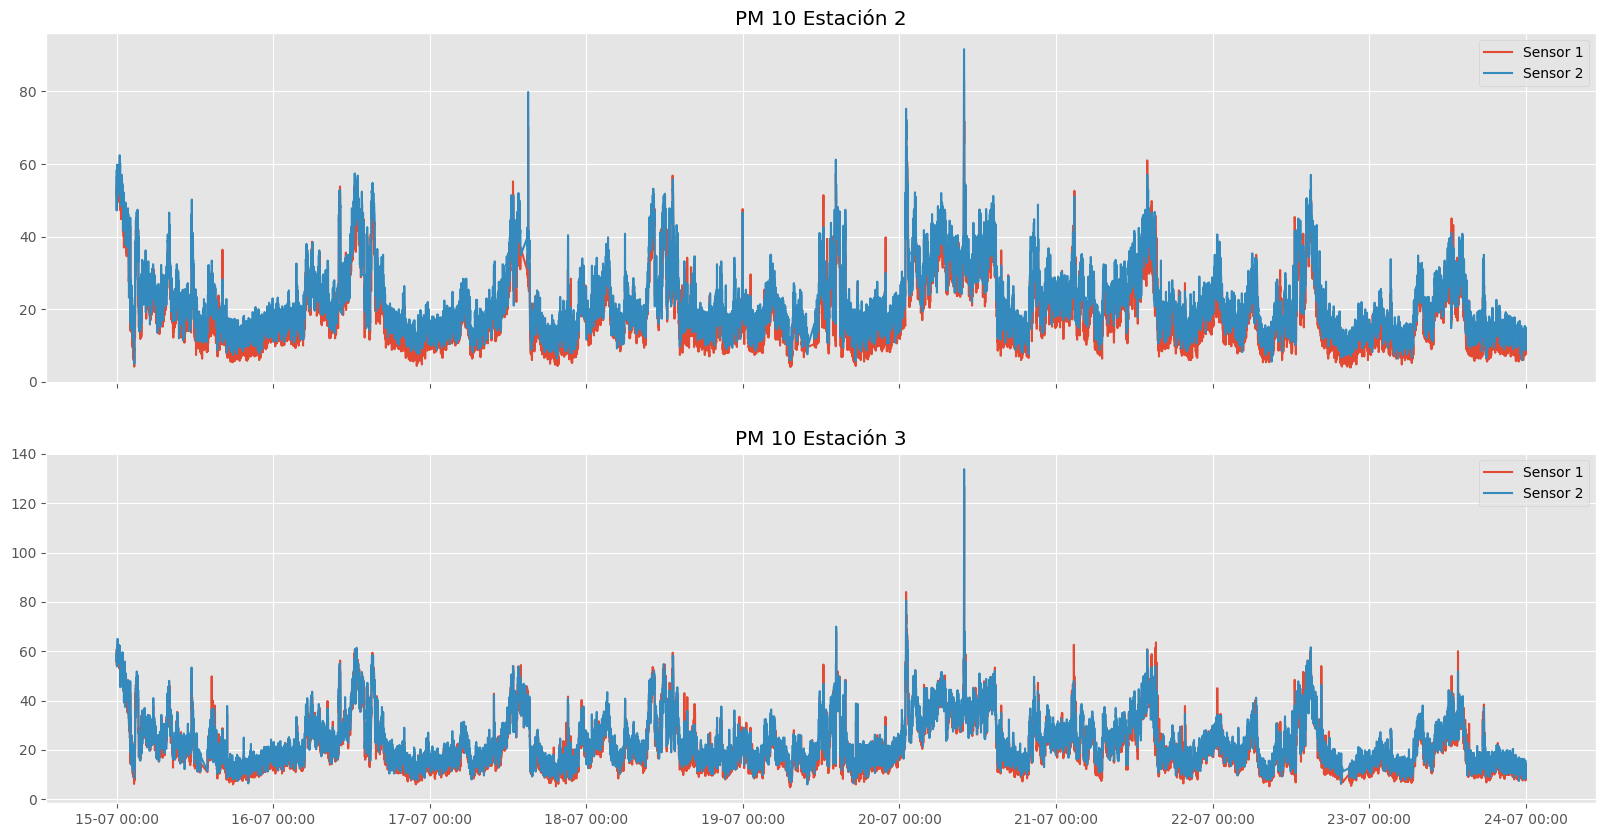

In [ ]:
# Graficamos los datos
plt.style.use('ggplot')
fig, axs = plt.subplots(2,1,figsize=(20, 10))

axs[0].plot(data_22.index, data_22['pm10_1'], label='Sensor 1')
axs[0].plot(data_22.index, data_22['pm10_2'], label='Sensor 2')
axs[0].set_title('PM 10 Estación 2')
axs[0].legend()
axs[0].set_xticklabels([])
# axs[0].xaxis.set_major_formatter(mdates.DateFormatter('%d-%m %H:%M'))

axs[1].plot(data_23.index, data_23['pm10_1'], label='Sensor 1')
axs[1].plot(data_23.index, data_23['pm10_2'], label='Sensor 2')
axs[1].set_title('PM 10 Estación 3')
axs[1].legend()
axs[1].xaxis.set_major_formatter(mdates.DateFormatter('%d-%m %H:%M'))


In [ ]:
#Eliminamos los datos atípicos
data_22 = data_22[data_22['pm10'] < 120]
data_23 = data_23[data_23['pm10'] < 120]


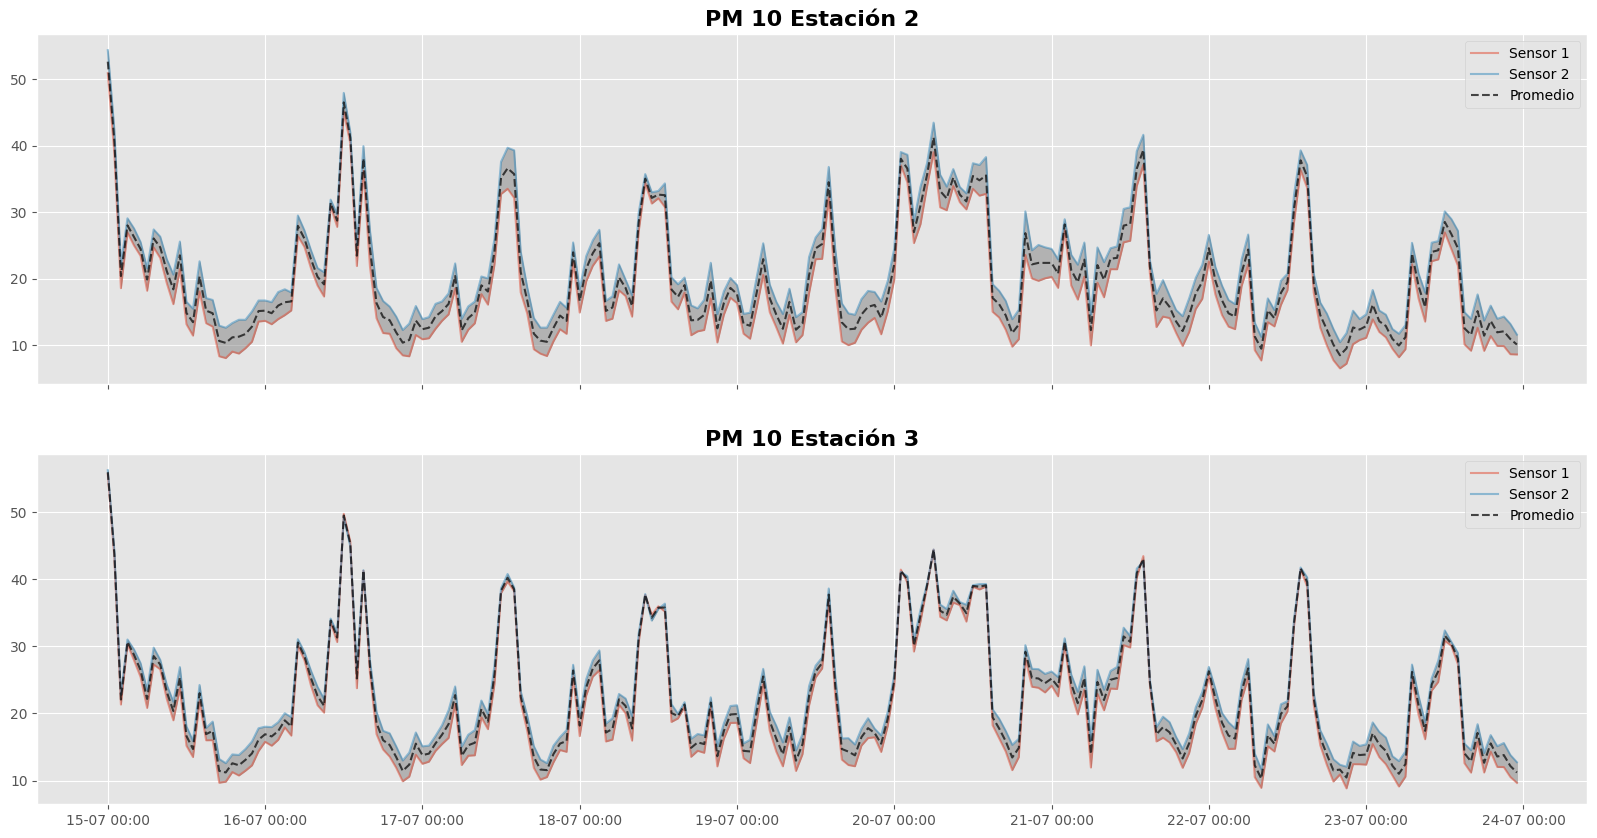

In [ ]:
#Promediamos por hora
data_22_hora = data_22.resample('H').mean().copy()
data_23_hora = data_23.resample('H').mean().copy()

#Graficamos los datos por hora
fig, axs = plt.subplots(2,1,figsize=(20, 10))

axs[0].plot(data_22_hora.index, data_22_hora['pm10_1'], label='Sensor 1', alpha=0.5)
axs[0].plot(data_22_hora.index, data_22_hora['pm10_2'], label='Sensor 2', alpha=0.5)
axs[0].fill_between(data_22_hora.index, data_22_hora['pm10_1'], data_22_hora['pm10_2'], alpha=0.5, color='grey')
axs[0].plot(data_22_hora.index, data_22_hora['pm10'], "--", label='Promedio', alpha=0.7, color='k')
axs[0].set_title('PM 10 Estación 2', fontsize=16, fontweight='bold')
axs[0].legend()
axs[0].set_xticklabels([])

axs[1].plot(data_23_hora.index, data_23_hora['pm10_1'], label='Sensor 1', alpha=0.5)
axs[1].plot(data_23_hora.index, data_23_hora['pm10_2'], label='Sensor 2', alpha=0.5)
axs[1].fill_between(data_23_hora.index, data_23_hora['pm10_1'], data_23_hora['pm10_2'], alpha=0.5, color='grey')
axs[1].plot(data_23_hora.index, data_23_hora['pm10'], "--", label='Promedio', alpha=0.7, color='k')
axs[1].set_title('PM 10 Estación 3', fontsize=16, fontweight='bold')
axs[1].legend()
axs[1].xaxis.set_major_formatter(mdates.DateFormatter('%d-%m %H:%M'))

In [ ]:
#Repetimos rápidamente la calibración de sensores
med_cuad_sensor = {}
for name in names:
    med_cuad_sensor[name+'_22'] = np.sqrt(np.mean((data_22_hora[name+'_1'] - data_22_hora[name+'_2'])**2))
    med_cuad_sensor[name+'_23'] = np.sqrt(np.mean((data_23_hora[name+'_1'] - data_23_hora[name+'_2'])**2))
df_resumen = pd.DataFrame(med_cuad_sensor, index=['media_cuadratica'])
df_resumen = df_resumen.T
df_resumen['media_cuadratica'] = df_resumen['media_cuadratica'].round(2)
#Añadimos una columna con la diferencia promedio entre sensores
df_resumen['diferencia_promedio'] = [(data_22_hora['pm1_1'] - data_22_hora['pm1_2']).mean(), (data_23_hora['pm1_1'] - data_23_hora['pm1_2']).mean(),
                                    (data_22_hora['pm25_1'] - data_22_hora['pm25_2']).mean(), (data_23_hora['pm25_1'] - data_23_hora['pm25_2']).mean(),
                                    (data_22_hora['pm10_1'] - data_22_hora['pm10_2']).mean(), (data_23_hora['pm10_1'] - data_23_hora['pm10_2']).mean()]

df_resumen['diferencia_promedio'] = df_resumen['diferencia_promedio'].round(2)
df_resumen

,media_cuadratica,diferencia_promedio
pm1_22,5.11,-5.05
pm1_23,2.92,-2.77
pm10_22,4.03,-3.74
pm10_23,2.55,-2.39
pm25_22,3.87,-3.90
pm25_23,2.58,-2.34


In [ ]:
#Comparemos ahora los datos entre estaciones
